# Comportamento Atacadista

Este notebook tem como objetivo entender o comportamento do atacadista

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Carregamento do dataset e separação dos dados do atacadista

In [2]:
columns_map = {
    'Doc. Date': 'PedidoDataDocumento',
    'Material': 'PedidoProdutoId',
    'Order qty': 'PedidoOrdem',
    'Ship-to nu': 'PedidoAtacadistaId',
    'PCS delivered': 'PedidoQuantidade',
    'HL delivered': 'PedidoHectolitroEntregue',
    'delivery_days': 'PedidoDiasEntrega',
    'delivery_flag': 'PedidoEntregue',
    'lead_time_creation_vs_rdd_flag': 'PedidoLeadTimeEntrega',
    'MACO/HL ': 'PedidoContribuicaoHectolitro',
    'Groupement': 'AtacadistaGrupoImpostoPreco',
    'Postal Code': 'AtacadistaCodigoPostal',
    'Street': 'AtacadistaRuaEndereco',
    'Sous groupement': 'AtacadistaSubgrupo',
    'M2_Territory_ID': 'AtacadistaLocalizacaoId',
    'M1_Territory_ID': 'AtacadistaSubLocalizacaoId',
    'Dépt': 'AtacadistaDepartamento',
    'Brand': 'ProdutoMarca',
    'Subrand': 'ProdutoSubmarca',
    'SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult': 'ProdutoSegmento2',
    'Container Type': 'ProdutoTipoContainer',
    'Container Size': 'ProdutoTamanhoContainer',
    'Variétés': 'ProdutoVariedade',
    'Segment LE': 'ProdutoSegmento1',
    'Latitude': 'AtacadistaLatitude',
    'Longitude': 'AtacadistaLongitude',
    'Degre Alc': 'ProdutoPercentAlcoolico',
    'TTC': 'PedidoPrecoFinalParaUmProd',
    'Brut + TE': 'PedidoTaxas',
    'DA': 'PedidoTaxaTransporteAereo',
    'Net + TE - Hors majoration de rompu de palette': 'PedidoPrecoLiquidoDescontoPaliteQuebrado'
}

In [3]:
df = pd.read_excel('Data.xlsx')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.map(columns_map)

In [4]:
print('Quantidade de atacadistas: ', len(df['PedidoAtacadistaId']))
print('Quantidade de atacadistas unicos: ', len(df['PedidoAtacadistaId'].unique()))

Quantidade de atacadistas:  73670
Quantidade de atacadistas unicos:  179


In [5]:
df_atacadista = df[[column for column in df.columns if 'Atacadista' in column]]
df_pedido = df[[column for column in df.columns if 'Pedido' in column]]

In [6]:
df_atacadista.drop_duplicates(subset=['PedidoAtacadistaId'], inplace=True)
print(len(df_atacadista))

179


<ipython-input-6-b7d910a3ac19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atacadista.drop_duplicates(subset=['PedidoAtacadistaId'], inplace=True)


In [7]:
df_atacadista.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 69643
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PedidoAtacadistaId           179 non-null    int64  
 1   AtacadistaGrupoImpostoPreco  179 non-null    object 
 2   AtacadistaCodigoPostal       179 non-null    int64  
 3   AtacadistaRuaEndereco        177 non-null    object 
 4   AtacadistaSubgrupo           177 non-null    object 
 5   AtacadistaLocalizacaoId      177 non-null    object 
 6   AtacadistaSubLocalizacaoId   177 non-null    object 
 7   AtacadistaDepartamento       177 non-null    float64
 8   AtacadistaLatitude           170 non-null    float64
 9   AtacadistaLongitude          170 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 15.4+ KB


In [8]:
df_atacadista

,PedidoAtacadistaId,AtacadistaGrupoImpostoPreco,AtacadistaCodigoPostal,AtacadistaRuaEndereco,AtacadistaSubgrupo,AtacadistaLocalizacaoId,AtacadistaSubLocalizacaoId,AtacadistaDepartamento,AtacadistaLatitude,AtacadistaLongitude
0,29606863,FRANCE BOISSONS,59160,RUE DU CHEMIN SAINT MARTIN,France BOISSONS,FR01_ON_1000,FR01_ON_1004,59.0,50.6455,2.9619
4,29378784,INDEPENDANTS,62570,PLACE JEAN JAURES,ALLAN,FR01_ON_2000,FR01_ON_2006,62.0,50.6978,2.2423
11,29379853,C10,70110,ROUTE D'HERICOURT,DAMIDEAUX MICHEL BOISSONS,FR01_ON_3000,FR01_ON_3006,70.0,47.5382,6.4026
23,29379855,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,43.7330,6.1765
35,29379861,C10,85700,AVENUE DE LA SEVRE,VINS REMY LIBOUREAU,FR01_ON_1200,FR01_ON_1201,85.0,46.8354,-0.7778
...,...,...,...,...,...,...,...,...,...,...
69291,29643421,NATIONAL CUSTOMER,77140,4 RUE DES PALIS,STEF Logistique Nemours,3M,3M,77.0,48.2751,2.6908
69337,29986364,NATIONAL CUSTOMER,78120,3 RUE JOSEPH JACQUARD ZA BU BEL AIR,SAS FILL,3M,3M,78.0,48.6167,1.9167
69430,40001857,NATIONAL CUSTOMER,94320,NaN,NICOLAS,3M,3M,94.0,48.7650,2.3961
69554,29983887,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,44.9975,5.1859


In [9]:
url = 'https://maps.googleapis.com/maps/api/geocode/json?address={}&key='
from requests import get

In [10]:
def get_location(street: str) -> dict:

    response = get(url.format(street))

    if response.status_code != 200:
        return None

    result = dict(response.json())
    componentes = result['results'][0]['address_components'] if len(result['results']) == 1 else []
    if len(componentes) == 0:
        return None
    
    result = {'country': None, 'state': None, 'city': None, 'neighborhood': ''}

    country = list(filter(lambda x: 'country' in x['types'], componentes))
    state = list(filter(lambda x: 'administrative_area_level_1' in x['types'], componentes))
    city = list(filter(lambda x: 'route' in x['types'], componentes)) or list(filter(lambda x: 'locality' in x['types'], componentes))
    neighborhood = list(filter(lambda x: 'neighborhood'in x['types'], componentes)) or list(filter(lambda x: 'sublocality_level_1' in x['types'], componentes))


    if len(country) == 1 and 'long_name' in country[0].keys():
        result['country'] = country[0]['long_name']

    if len(state) == 1 and 'long_name' in state[0].keys():
        result['state'] = state[0]['long_name']

    if len(city) == 1 and 'long_name' in city[0].keys():
        result['city'] = city[0]['long_name']

    if len(neighborhood) == 1 and 'long_name' in neighborhood[0].keys():
        result['neighborhood'] = neighborhood[0]['long_name']

    return result

In [11]:
get_location("10 RUE DE L'ABBAYE DE LEONCEL")

{'country': 'France',
 'state': 'Auvergne-Rhône-Alpes',
 'city': 'Léoncel',
 'neighborhood': ''}

In [12]:
df_atacadista['AtacadistaRuaEndereco'].fillna('', inplace=True)

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
location_data = []

for street in df['AtacadistaRuaEndereco'].unique():
    data = get_location(street)
    if data:
        data['key'] = street
        location_data.append(data)

In [14]:
location_data[0:2]

[{'country': 'France',
  'state': 'Hauts-de-France',
  'city': 'Rue du Chemin Saint-Martin',
  'neighborhood': '',
  'key': 'RUE DU CHEMIN SAINT MARTIN'},
 {'country': 'France',
  'state': 'Occitanie',
  'city': 'Place Jean Jaurès',
  'neighborhood': '',
  'key': 'PLACE JEAN JAURES'}]

In [15]:
df_atacadista = pd.merge(df_atacadista, pd.DataFrame(location_data), left_on='AtacadistaRuaEndereco', right_on='key', how='left')
df_atacadista.drop(columns=['key'], inplace=True)

In [16]:
df_atacadista.head()

,PedidoAtacadistaId,AtacadistaGrupoImpostoPreco,AtacadistaCodigoPostal,AtacadistaRuaEndereco,AtacadistaSubgrupo,AtacadistaLocalizacaoId,AtacadistaSubLocalizacaoId,AtacadistaDepartamento,AtacadistaLatitude,AtacadistaLongitude,country,state,city,neighborhood
0,29606863,FRANCE BOISSONS,59160,RUE DU CHEMIN SAINT MARTIN,France BOISSONS,FR01_ON_1000,FR01_ON_1004,59.0,50.6455,2.9619,France,Hauts-de-France,Rue du Chemin Saint-Martin,
1,29378784,INDEPENDANTS,62570,PLACE JEAN JAURES,ALLAN,FR01_ON_2000,FR01_ON_2006,62.0,50.6978,2.2423,France,Occitanie,Place Jean Jaurès,
2,29379853,C10,70110,ROUTE D'HERICOURT,DAMIDEAUX MICHEL BOISSONS,FR01_ON_3000,FR01_ON_3006,70.0,47.5382,6.4026,France,Normandie,Avenue d'Harcourt,
3,29379855,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,43.7330,6.1765,France,Provence-Alpes-Côte d'Azur,Route de Sillans,
4,29379861,C10,85700,AVENUE DE LA SEVRE,VINS REMY LIBOUREAU,FR01_ON_1200,FR01_ON_1201,85.0,46.8354,-0.7778,France,Île-de-France,Rue de Sèvres,


In [17]:
df = df_atacadista[['PedidoAtacadistaId', 'AtacadistaGrupoImpostoPreco', 'AtacadistaSubgrupo', 'AtacadistaLocalizacaoId', 'AtacadistaDepartamento', 'country', 'state', 'city']]

In [18]:
df.head()

,PedidoAtacadistaId,AtacadistaGrupoImpostoPreco,AtacadistaSubgrupo,AtacadistaLocalizacaoId,AtacadistaDepartamento,country,state,city
0,29606863,FRANCE BOISSONS,France BOISSONS,FR01_ON_1000,59.0,France,Hauts-de-France,Rue du Chemin Saint-Martin
1,29378784,INDEPENDANTS,ALLAN,FR01_ON_2000,62.0,France,Occitanie,Place Jean Jaurès
2,29379853,C10,DAMIDEAUX MICHEL BOISSONS,FR01_ON_3000,70.0,France,Normandie,Avenue d'Harcourt
3,29379855,C10,OLIVIER FRERES,FR01_ON_6000,83.0,France,Provence-Alpes-Côte d'Azur,Route de Sillans
4,29379861,C10,VINS REMY LIBOUREAU,FR01_ON_1200,85.0,France,Île-de-France,Rue de Sèvres


In [19]:
df['country'].value_counts()

France           118
Canada            10
United States      6
Luxembourg         2
Belgium            1
Switzerland        1
Lebanon            1
Name: country, dtype: int64

In [20]:
df['state'].value_counts()

Île-de-France                     29
Auvergne-Rhône-Alpes              14
Hauts-de-France                   13
Occitanie                         12
Nouvelle-Aquitaine                11
Provence-Alpes-Côte d'Azur         8
Québec                             8
Bretagne                           7
Centre-Val de Loire                7
Grand Est                          6
Normandie                          4
Pays de la Loire                   4
California                         2
Bourgogne-Franche-Comté            2
Quebec                             2
New York                           2
District de Luxembourg             2
Massachusetts                      1
Beirut Governorate                 1
Brittany                           1
Genève                             1
Rhode Island                       1
Brussels Hoofdstedelijk Gewest     1
Name: state, dtype: int64

In [21]:
df['city'].value_counts()

Main Street                 2
Impasse des Marsouins       2
Rue de Bonnevoie            1
Boulevard Léon Bollée       1
Avenue de l'Eguillette      1
                           ..
Avenue des Eaux Blanches    1
Chemin des Margueritois     1
Chemin Ormissets Zi         1
Rue du Grand Clos           1
Rue Maurice Utrillo         1
Name: city, Length: 136, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

df_feature = pd.DataFrame(df[['PedidoAtacadistaId', 'AtacadistaDepartamento']], index=df.index)
encoders_atacadista = {}

for column in df[['AtacadistaGrupoImpostoPreco', 'AtacadistaSubgrupo', 'AtacadistaLocalizacaoId', 'AtacadistaDepartamento', 'country', 'state', 'city']].columns:
    encoders_atacadista[column] = LabelEncoder()
    df_feature[column] = encoders_atacadista[column].fit_transform(df[column])

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler_atacadista = {}
for column in df_feature.drop(columns=['PedidoAtacadistaId']).columns:
    scaler_atacadista[column] = MinMaxScaler()
    df_feature[column] = scaler_atacadista[column].fit_transform(df_feature[column].values.reshape(-1,1))

In [24]:
df_feature.head()

,PedidoAtacadistaId,AtacadistaDepartamento,AtacadistaGrupoImpostoPreco,AtacadistaSubgrupo,AtacadistaLocalizacaoId,country,state,city
0,29606863,0.539474,0.50,0.410714,0.076923,0.285714,0.478261,0.817518
1,29378784,0.565789,0.75,0.017857,0.384615,0.285714,0.695652,0.335766
2,29379853,0.671053,0.00,0.250000,0.461538,0.285714,0.608696,0.065693
3,29379855,0.842105,0.00,0.660714,0.692308,0.285714,0.782609,0.401460
4,29379861,0.868421,0.00,0.991071,0.230769,0.285714,0.956522,0.708029


In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [26]:
def quantidade_cluster(data, max_cluster):
    wcss = []
    for n in range(2, max_cluster):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def quantidade_cluster_otima(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [27]:
wcss = quantidade_cluster(df_feature.drop(columns=['PedidoAtacadistaId']), 21)
n_cluster = quantidade_cluster_otima(wcss)
print('Quantidade cluster: ', n_cluster)

Quantidade cluster:  7


In [28]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_feature.drop(columns=['PedidoAtacadistaId']))

In [29]:
print(pca.explained_variance_ratio_)

print('Total de correlação explicada pelos {} componentes principais: {}'.format(pca.n_components, sum(pca.explained_variance_ratio_)))

[0.3207065  0.19140259]
Total de correlação explicada pelos 2 componentes principais: 0.5121090871019138


In [30]:
knn = KMeans(n_clusters=n_cluster)
labels = knn.fit_predict(components)

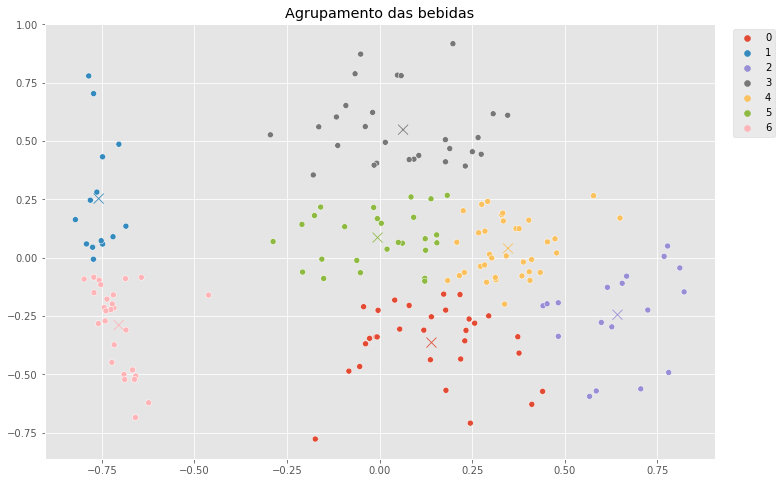

In [31]:
palette = { label: f'C{i}' for i, label in enumerate(range(knn.n_clusters))}

plt.figure(figsize=(12,8))
plt.title('Agrupamento das bebidas')
ax = sns.scatterplot(x=components[:,0], y=components[:,1], hue=knn.labels_, palette=palette)
sns.scatterplot(x=knn.cluster_centers_[:,0], y=knn.cluster_centers_[:,1], hue=range(knn.n_clusters), s=100, palette=palette, legend=False, ax=ax, marker='x')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [32]:
df['cluster'] = labels
df_feature['cluster'] = labels

<ipython-input-32-c2ee56dc8a09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = labels


In [33]:
import pickle

pickle.dump(encoders_atacadista, open('encoders_atacadista.pickle', 'wb'))
pickle.dump(scaler_atacadista, open('scaler_atacadista.pickle', 'wb'))

df.to_csv('df_atacadista.csv', header=True)
df_feature.to_csv('df_atacadista_feature.csv', header=True)